### Libraries


In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import librosa
import os
import matplotlib.pyplot as plt
import warnings
from itertools import islice
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

# Import your chosen regression model here

### CSV File readings


In [43]:
# Define a function to map the age ranges to integer values
def map_age_range(age):
    if age == "teens":
        return random.randint(13, 19)
    elif age == "twenties":
        return random.randint(20, 30)
    elif age == "thirties":
        return random.randint(30, 40)
    elif age == "fourties":
        return random.randint(40, 50)
    elif age == "fifties":
        return random.randint(50, 60)
    elif age == "sixties":
        return random.randint(60, 70)
    elif age == "seventies":
        return random.randint(70, 80)
    elif age == "eighties":
        return random.randint(80, 90)
    elif age == "nineties":
        return random.randint(90, 100)
    else:
        return 0

In [44]:
# Read the CSV file
df = pd.read_csv("Dataset\cv-valid-test.csv")

# Keep only the filename and age columns
df = df[["filename", "age"]]
df.dropna(subset=["age"], inplace=True)

# Print the resulting dataframe
print(df)


# Replace the age categories with integer values
df["age"] = df["age"].apply(map_age_range)

# Print the resulting dataframe
print(df)


df.to_csv("Dataset/results.csv", index=False)

                             filename       age
1     cv-valid-test/sample-000001.mp3  twenties
3     cv-valid-test/sample-000003.mp3  twenties
5     cv-valid-test/sample-000005.mp3  twenties
6     cv-valid-test/sample-000006.mp3  twenties
7     cv-valid-test/sample-000007.mp3  thirties
...                               ...       ...
3976  cv-valid-test/sample-003976.mp3  thirties
3979  cv-valid-test/sample-003979.mp3  thirties
3980  cv-valid-test/sample-003980.mp3   fifties
3984  cv-valid-test/sample-003984.mp3  thirties
3989  cv-valid-test/sample-003989.mp3   fifties

[1542 rows x 2 columns]
                             filename  age
1     cv-valid-test/sample-000001.mp3   30
3     cv-valid-test/sample-000003.mp3   21
5     cv-valid-test/sample-000005.mp3   28
6     cv-valid-test/sample-000006.mp3   26
7     cv-valid-test/sample-000007.mp3   31
...                               ...  ...
3976  cv-valid-test/sample-003976.mp3   38
3979  cv-valid-test/sample-003979.mp3   40
3980  cv-val

In [45]:
# Read the CSV file
df = pd.read_csv("Dataset/truncated_train.csv")

# Keep only the filename and age columns
df = df[["filename", "age"]]
df.dropna(subset=["age"], inplace=True)

# Print the resulting dataframe
print(df)

# Replace the age categories with integer values
df["age"] = df["age"].apply(map_age_range)

# Print the resulting dataframe
print(df)


df.to_csv("Dataset/training_set.csv", index=False)

                               filename        age
5      cv-valid-train/sample-000005.mp3   twenties
8      cv-valid-train/sample-000008.mp3  seventies
13     cv-valid-train/sample-000013.mp3   thirties
14     cv-valid-train/sample-000014.mp3    sixties
19     cv-valid-train/sample-000019.mp3    fifties
...                                 ...        ...
14993  cv-valid-train/sample-014993.mp3   fourties
14994  cv-valid-train/sample-014994.mp3   thirties
14995  cv-valid-train/sample-014995.mp3   thirties
14998  cv-valid-train/sample-014998.mp3   fourties
15000  cv-valid-train/sample-015000.mp3   twenties

[5615 rows x 2 columns]
                               filename  age
5      cv-valid-train/sample-000005.mp3   23
8      cv-valid-train/sample-000008.mp3   75
13     cv-valid-train/sample-000013.mp3   31
14     cv-valid-train/sample-000014.mp3   65
19     cv-valid-train/sample-000019.mp3   56
...                                 ...  ...
14993  cv-valid-train/sample-014993.mp3   49
149

### Feature Extraction


# A little problem with spectral features need to fix it value not in int or float so creating problems in training


In [46]:
def extract_features(filename):
    y, sr = librosa.load(filename)

    # Extract pitch
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch = np.mean(pitches)
    # print(f"Pitches: {pitch}")

    # Extract formant frequencies (example)
    # Formant extraction is more complex and usually requires dedicated libraries like Praat or specialized algorithms
    # For simplicity, we'll just extract the mean frequency of the spectrum
    spectrum = np.abs(librosa.stft(y))
    formants = np.mean(librosa.feature.spectral_centroid(S=spectrum))

    # Extract intensity
    intensity = np.mean(librosa.feature.rms(y=y))

    # Extract duration
    duration = librosa.get_duration(y=y, sr=sr)

    # Extract spectral features (example)
    spectral_features = librosa.feature.mfcc(y=y, sr=sr)

    # Create a list of features
    features = [pitch, formants, intensity, duration, spectral_features]

    return features

In [47]:
# Read the CSV file
df = pd.read_csv("Dataset/training_set.csv")

# Print the resulting dataframe
print(df)

# Create an empty list to store the features
features_list = []

# Iterate over the first 10 filenames in the DataFrame
# for filename in islice(df['filename'], 10):
for filename in df["filename"]:
    # Construct the full file path
    file_path = "Dataset/" + filename

    # Extract the features for the current file
    features = extract_features(file_path)

    # Append the features to the list
    features_list.append(features)

# Convert the list of features to a DataFrame
features_df = pd.DataFrame(features_list)

# Print the resulting DataFrame
print(features_df)

# Save features as a CSV file
# Read the training set CSV file
training_set = pd.read_csv("Dataset/training_set.csv")

# Add the features to the training set DataFrame
training_set["pitch"] = features_df[0]
training_set["formant_frequency"] = features_df[1]
training_set["intensity"] = features_df[2]
training_set["duration"] = features_df[3]
training_set["spectral_features"] = features_df[4]

# Save the updated training set DataFrame to a new CSV file
training_set.to_csv("Dataset/training_set_with_features.csv", index=False)

                              filename  age
0     cv-valid-train/sample-000005.mp3   23
1     cv-valid-train/sample-000008.mp3   75
2     cv-valid-train/sample-000013.mp3   31
3     cv-valid-train/sample-000014.mp3   65
4     cv-valid-train/sample-000019.mp3   56
...                                ...  ...
5610  cv-valid-train/sample-014993.mp3   49
5611  cv-valid-train/sample-014994.mp3   31
5612  cv-valid-train/sample-014995.mp3   30
5613  cv-valid-train/sample-014998.mp3   40
5614  cv-valid-train/sample-015000.mp3   26

[5615 rows x 2 columns]
Pitches: 15.15438461303711
Pitches: 45.197166442871094
Pitches: 34.405574798583984
Pitches: 6.007706165313721
Pitches: 10.936522483825684
Pitches: 62.21162033081055
Pitches: 36.112022399902344
Pitches: 35.401248931884766
Pitches: 47.72825622558594
Pitches: 14.805465698242188
Pitches: 62.04269790649414
Pitches: 27.224609375
Pitches: 55.780426025390625
Pitches: 50.89326095581055
Pitches: 64.69747924804688
Pitches: 36.015869140625
Pitches: 40.639

KeyboardInterrupt: 

### Graph Plotting


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


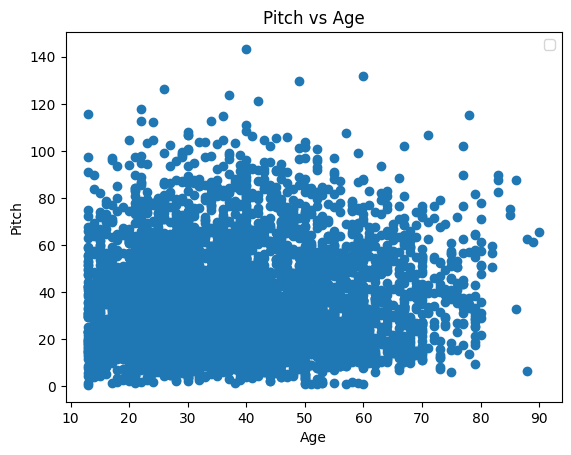

In [ ]:
features_df = pd.read_csv("Dataset/training_set_with_features.csv")

# Set the labels and title
plt.scatter(features_df["age"], features_df["pitch"])
plt.xlabel("Age")
plt.ylabel("Pitch")
plt.title("Pitch vs Age")

# Add a legend
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


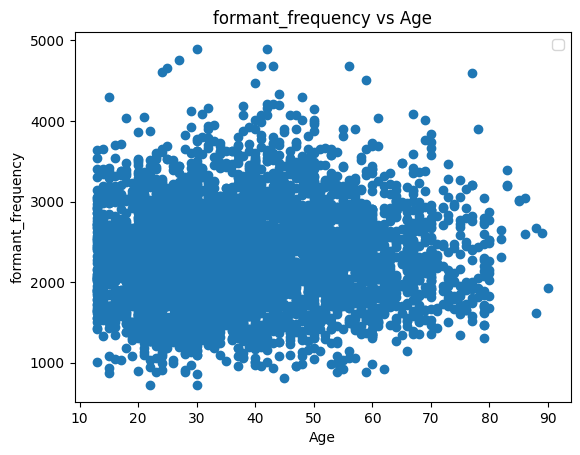

In [ ]:
# Set the labels and title
plt.scatter(features_df["age"], features_df["formant_frequency"])
plt.xlabel("Age")
plt.ylabel("formant_frequency")
plt.title("formant_frequency vs Age")

# Add a legend
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


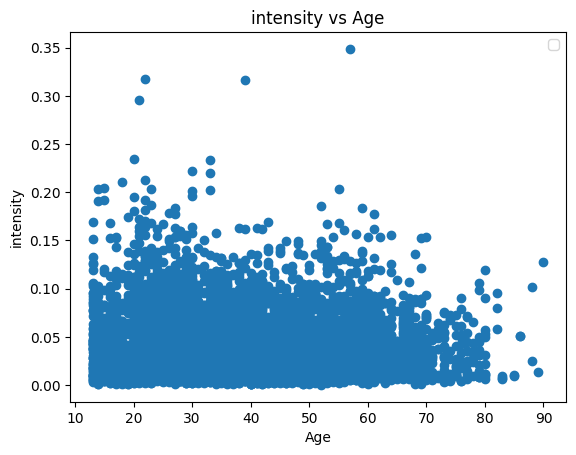

In [ ]:
# Set the labels and title
plt.scatter(features_df["age"], features_df["intensity"])
plt.xlabel("Age")
plt.ylabel("intensity")
plt.title("intensity vs Age")

# Add a legend
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


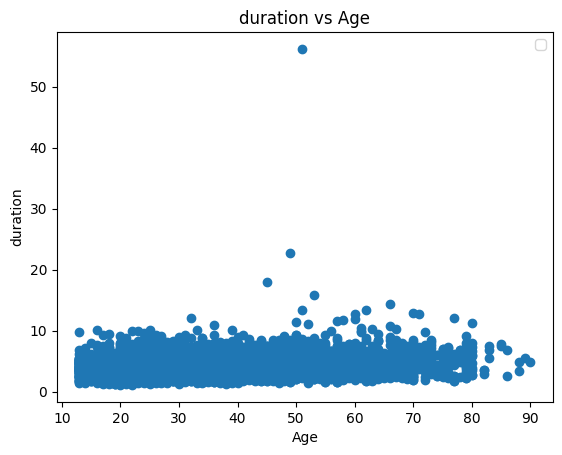

In [ ]:
# Set the labels and title
plt.scatter(features_df["age"], features_df["duration"])
plt.xlabel("Age")
plt.ylabel("duration")
plt.title("duration vs Age")

# Add a legend
plt.legend()

# Show the plot
plt.show()

# A little problem with spectral features need to fix it to fix graph


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


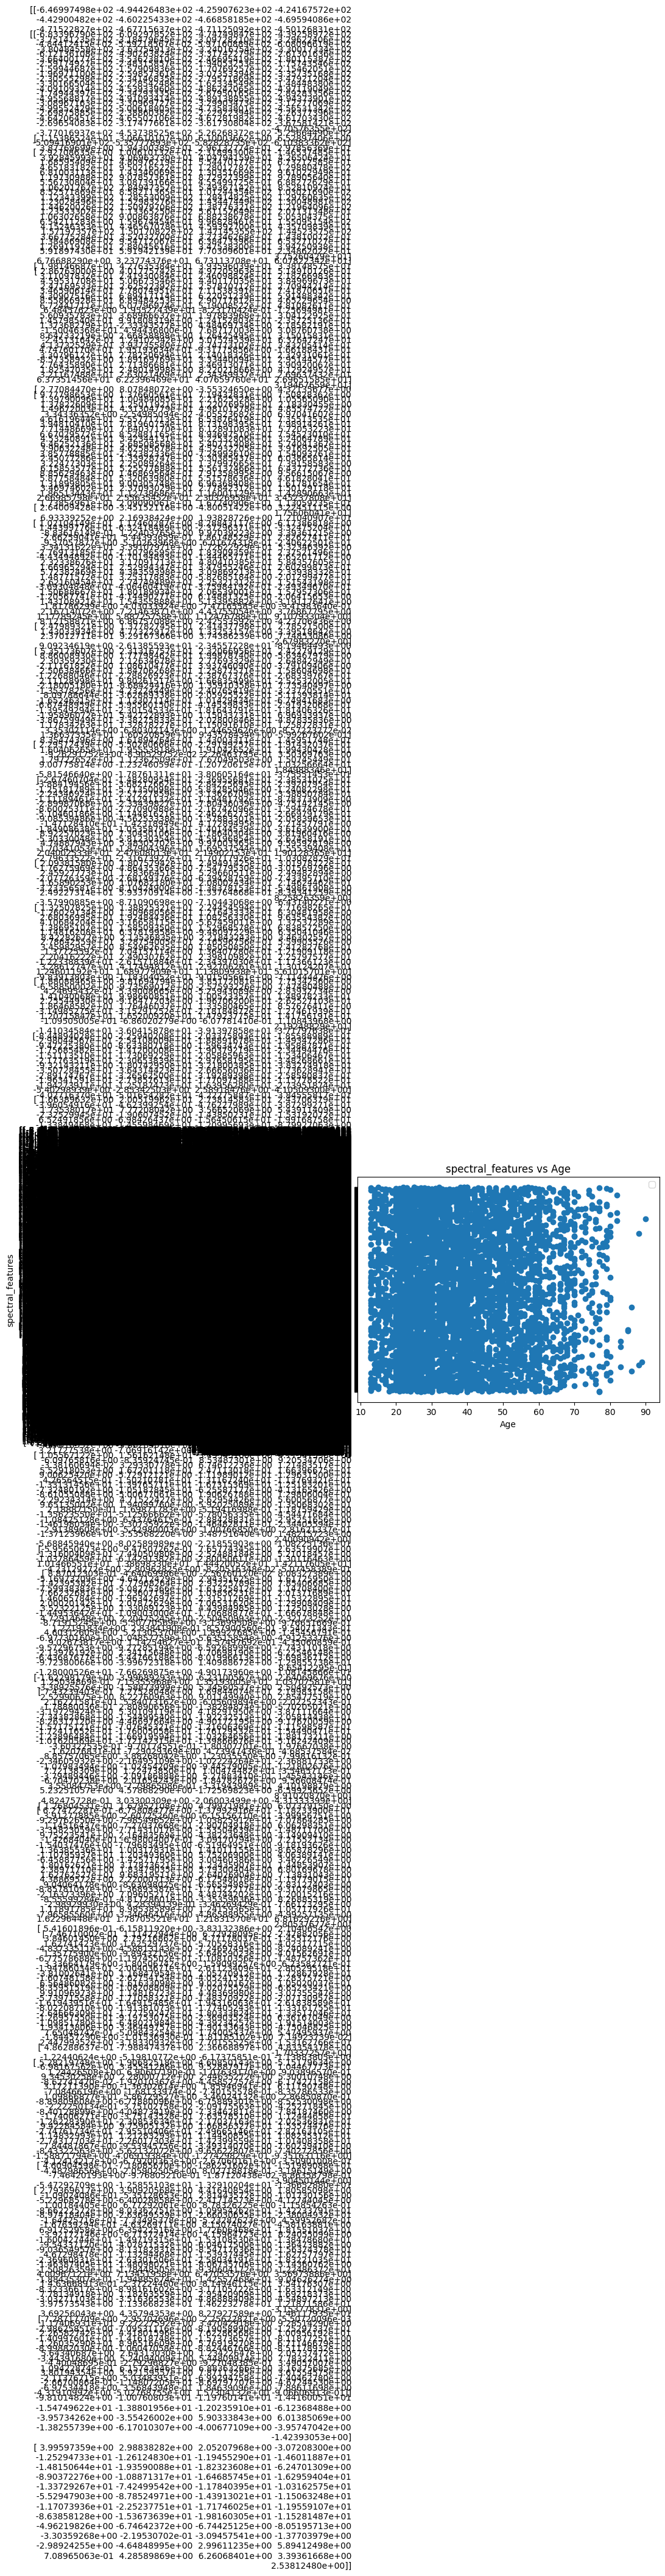

In [ ]:
# Set the labels and title
plt.scatter(features_df["age"], features_df["spectral_features"])
plt.xlabel("Age")
plt.ylabel("spectral_features")
plt.title("spectral_features vs Age")

# Add a legend
plt.legend()

# Show the plot
plt.show()

### regression model


# Create own model the builtin for testing was shit


In [ ]:
# Create an instance of the LinearRegression model
model = LinearRegression()

column_names = features_df.columns.tolist()
column_names.remove("filename")
column_names.remove("age")
column_names.remove("spectral_features")
print(column_names)


# Fit the model to the training data
model.fit(features_df[column_names], df["age"])

# Predict the age using the trained model
predictions = model.predict(features_df[column_names])

# Print the predicted ages
print(predictions)

['pitch', 'formant_frequency', 'intensity', 'duration']
[39.53608467 35.77582045 37.71114112 ... 35.48370743 37.42072169
 37.43490669]


### Accuracy and mean


In [ ]:
def accuracy(y_true, y_pred):
    """
    Calculate the R-squared accuracy score for regression.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values

    Returns:
    - accuracy: float, R-squared score
    """
    return r2_score(y_true, y_pred)

In [ ]:
accuracy(df["age"], predictions)

0.03238788877479759

In [ ]:
# Save the model to a file
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(df["age"], predictions)

# Print the mean squared error
print("Mean Squared Error:", mse)

Mean Squared Error: 222.2702684602807


### Final


# Correct training will fix it


In [ ]:
# Read the results.csv file
results_df = pd.read_csv("Dataset/results.csv")

# Extract the features for each file in results_df
features_list = []
for filename in results_df["filename"]:
    file_path = filename
    features = extract_features(file_path)
    features_list.append(features)

# Convert the list of features to a DataFrame
features_df = pd.DataFrame(features_list)

# Load the trained model from the model.pkl file
with open("model.pkl", "rb") as file:
    model = pickle.load(file)

# Use the loaded model for predictions or other operations
predictions = model.predict(features_df[column_names])

# Make predictions using the trained model
predictions = model.predict(features_df[column_names])

# Add the predicted age to the results DataFrame
results_df["predicted_age"] = predictions

# Display the results DataFrame
print(results_df)

FileNotFoundError: [Errno 2] No such file or directory: 'cv-valid-test/sample-000001.mp3'